# Daily Challenge: Complete Exploratory Data Analysis.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
def download_and_read_csv(dataset_link):
    """
    Downloads a dataset from Kaggle using the provided dataset link and creates a DataFrame from the downloaded CSV file.

    Args:
    - dataset_link (str): The Kaggle dataset link.

    Returns:
    - df (DataFrame): The DataFrame created from the downloaded CSV file.
    """
    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files(dataset_link, path=".", unzip=True)
    files = os.listdir()

    for file in files:
        if file.endswith('.csv'):
            print(f"Found CSV file: {file}")
            df = pd.read_csv(file)
            return df

In [6]:
dataset_link = 'milanvaddoriya/data-science-job-salary'
df_salary = download_and_read_csv(dataset_link)
df = df_salary.copy()

Found CSV file: datascience_salaries.csv


In [7]:
df.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


In [10]:
df.isnull().sum() # no missings

Unnamed: 0          0
job_title           0
job_type            0
experience_level    0
location            0
salary_currency     0
salary              0
dtype: int64

In [11]:
df.duplicated().sum() # no duplicates

0

In [13]:
data_temp = df.pivot_table(index='experience_level', values='salary', aggfunc=['mean', 'median'], observed=False)
print(data_temp)

                     mean   median
                   salary   salary
experience_level                  
Entry            36111.11 30000.00
Executive        76076.92 46000.00
Mid              51786.89 51000.00
Senior           75088.03 68000.00


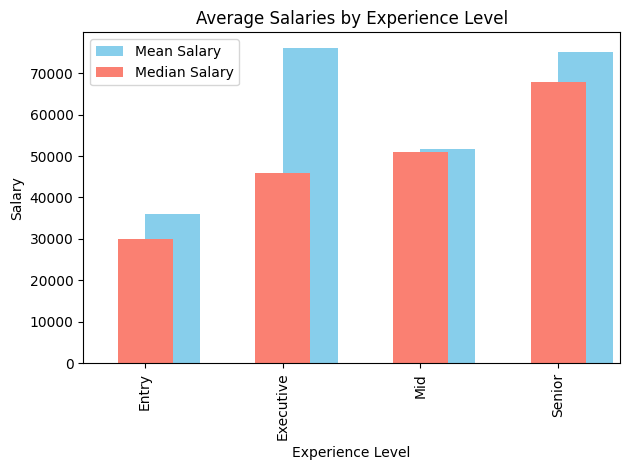

In [16]:
fig, ax = plt.subplots()

# Plot mean salary
data_temp[('mean', 'salary')].plot(kind='bar', color='skyblue', ax=ax, position=0, width=0.4, align='center')

# Plot median salary
data_temp[('median', 'salary')].plot(kind='bar', color='salmon', ax=ax, position=1, width=0.4, align='edge')

# Adding labels and title
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.title('Average Salaries by Experience Level')
plt.legend(['Mean Salary', 'Median Salary'])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()